# Applying PCA on tittle clusters

**Motivation:**  
Perform PCA on titles.  
- Each title can be assigned into one of the following groups:
    1. `administration`
    2. `epithet`
    3. `family`
    4. `priest`
    5. `privy`
    6. `rank`
    7. `worker`
    8. `none`


**Workflow:**
- Load the dataset `person_title_cluster_pivot_v2`, which contains:
  - Rows: individual persons.  
  - Columns: the number of titles each person holds within a given group.
  - Source: `df_encoding_title_to_clusters.ipynb`.
- Perform PCA on this dataset.
- Plot the projection of feature vectors.
- Save the PCA results.


### loads

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

import set_path
from supp.support_load import read_csv, read_excel
from supp.support_merge import merge, group_to_list
from supp.support_save import save_df
from supp.support_constants import VIZIER_IDS, PATH_DATA_MERGED

In [2]:
# load dataframe with binary encoded titles
vizier__35_title_list = read_csv('vizier__35_title_list')
# load df with sex of persons
df_sex = read_csv('08_sex')
print(f'{vizier__35_title_list.shape}\tshape of vizier__35_title_list')
print(f'{df_sex.shape}\tshape of df_sex')

CSV file loaded.
C:\Users\Stoja\OneDrive\Documents\diplomka\scr\data\unpacked\df_person_all\merged\vizier__35_title_list.csv
CSV file loaded.
C:\Users\Stoja\OneDrive\Documents\diplomka\scr\data\unpacked\df_person_all\08_sex.csv
(4962, 2184)	shape of vizier__35_title_list
(4962, 3)	shape of df_sex


In [3]:
# get ID_persons of males
male_id_list = df_sex.loc[df_sex['male']==1, 'ID_person'].to_list()
df_titles = vizier__35_title_list.loc[vizier__35_title_list['ID_person'].isin(male_id_list), :]
df_person_id = df_titles[['ID_person']]
print(f'{df_person_id.shape}\tshape of df_person_id')
df_person_id.head()

(3930, 1)	shape of df_person_id


,ID_person
0,322
1,323
2,324
3,325
4,326


In [4]:
# read clusters
df_clusters = read_csv('person_title_cluster_pivot_v2')
print(f'{df_clusters.shape}\toriginal shape')
df_clusters = df_person_id.merge(df_clusters, on='ID_person', how='left')
df_clusters = df_clusters.fillna(0)
print(f'{df_clusters.shape}\tshape after merge')
df_clusters.set_index('ID_person', inplace=True)
#  Drop column 'none' columns
# df_clusters = df_clusters.drop('none', axis=1)
# df_clusters = df_clusters[df_clusters.sum(axis=1)>0]
# print(f'{df_clusters.shape}\tshape after restriction')
df_clusters.head()

CSV file loaded.
C:\Users\Stoja\OneDrive\Documents\diplomka\scr\data\person_title_cluster_pivot_v2.csv
(3977, 9)	original shape
(3930, 9)	shape after merge


,administration,epithet,family,none,priest,privy,rank,worker
ID_person,,,,,,,,
322,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
326,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### functions

In [45]:
def plot_PCA_2(pca, x_ax=1, y_ax=2):
    # Plot arrows representing original features in PCA space
    plt.figure(figsize=(6, 6))
    
    # Scaling factor for the arrows (to make them visible)
    arrow_size = 1
    colors = plt.cm.tab10.colors
    
    # Plot arrows and feature names
    loadings = pca.components_.T* np.sqrt(pca.explained_variance_)
    for i, v in enumerate(loadings):
        cluster = data.columns[i]
        plt.quiver(0, 0, v[x_ax-1] * arrow_size, v[y_ax-1] * arrow_size, angles='xy', scale_units='xy', scale=1, color=colors[i],
                   alpha=1, label=cluster, width=0.011 )
        #plt.arrow(0, 0, v[0] * arrow_size, v[1] * arrow_size, color=colors[i], alpha=0.5)
        #plt.text(v[0] * arrow_size * size[cluster], v[1] * arrow_size * size[cluster], data.columns[i], color='black', ha='center', va='center')
    # Set the limits for x and y axes
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    # Create custom legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.gca().set_aspect('equal', adjustable='box')
    
    
    plt.xlabel(f'Principal Component {x_ax}')
    plt.ylabel(f'Principal Component {y_ax}')
    plt.title(f'Projection of Feature Vectors\n Principal Component {x_ax} vs {y_ax}')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

In [19]:
def plot_PCA(pca, x_ax=1, y_ax=2):
    # Plot arrows representing original features in PCA space
    plt.figure(figsize=(6, 6))
    
    # Scaling factor for the arrows (to make them visible)
    arrow_size = 1
    colors = plt.cm.tab10.colors
    
    # Plot arrows and feature names
    for i, v in enumerate(pca.components_.T):
        cluster = data.columns[i]
        plt.quiver(0, 0, v[x_ax-1] * arrow_size, v[y_ax-1] * arrow_size, angles='xy', scale_units='xy', scale=1, color=colors[i],
                   alpha=1, label=cluster, width=0.011 )
        #plt.arrow(0, 0, v[0] * arrow_size, v[1] * arrow_size, color=colors[i], alpha=0.5)
        #plt.text(v[0] * arrow_size * size[cluster], v[1] * arrow_size * size[cluster], data.columns[i], color='black', ha='center', va='center')
    # Set the limits for x and y axes
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    # Create custom legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.gca().set_aspect('equal', adjustable='box')
    
    
    plt.xlabel(f'Principal Component {x_ax}')
    plt.ylabel(f'Principal Component {y_ax}')
    plt.title(f'Projection of Feature Vectors\n Principal Component {x_ax} vs {y_ax}')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

### perform PCA

In [24]:
df_clusters.columns

Index(['administration', 'epithet', 'family', 'none', 'priest', 'privy',
       'rank', 'worker'],
      dtype='object')

In [6]:
data0 = df_clusters.copy()
data0.describe()

,administration,epithet,family,none,priest,privy,rank,worker
count,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000
mean,0.639949,0.423664,0.253690,0.673791,0.473537,0.146565,0.309924,0.125954
std,1.620806,1.126917,0.557252,1.606791,1.105039,0.585647,0.794886,0.482489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,23.000000,16.000000,7.000000,21.000000,24.000000,11.000000,12.000000,6.000000


In [7]:
# scale data
data = (data0-data0.mean())/data0.std()
data.describe()

,administration,epithet,family,none,priest,privy,rank,worker
count,3930.000000,3.930000e+03,3.930000e+03,3.930000e+03,3.930000e+03,3.930000e+03,3.930000e+03,3.930000e+03
mean,0.000000,-1.446397e-17,-2.169596e-17,-6.508788e-17,1.446397e-17,7.231987e-18,1.265598e-17,6.147189e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-0.394834,-3.759498e-01,-4.552511e-01,-4.193398e-01,-4.285250e-01,-2.502614e-01,-3.898971e-01,-2.610511e-01
25%,-0.394834,-3.759498e-01,-4.552511e-01,-4.193398e-01,-4.285250e-01,-2.502614e-01,-3.898971e-01,-2.610511e-01
50%,-0.394834,-3.759498e-01,-4.552511e-01,-4.193398e-01,-4.285250e-01,-2.502614e-01,-3.898971e-01,-2.610511e-01
75%,0.222143,-3.759498e-01,-4.552511e-01,2.030187e-01,4.764203e-01,-2.502614e-01,-3.898971e-01,-2.610511e-01
max,13.795638,1.382208e+01,1.210639e+01,1.265019e+01,2.129016e+01,1.853238e+01,1.470661e+01,1.217447e+01


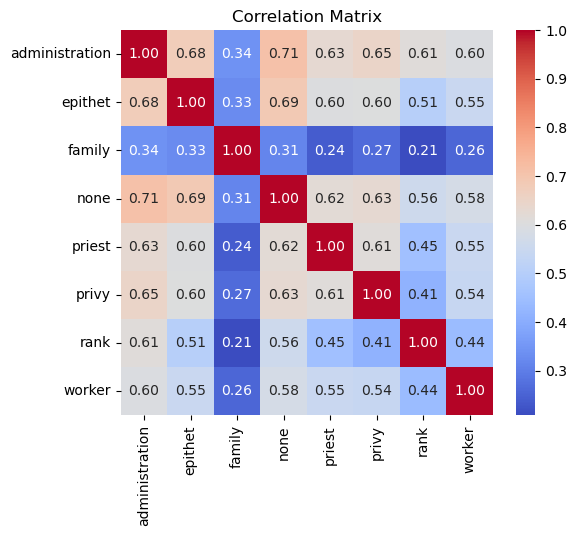

In [8]:
# compute correlation matrix
correlation_matrix = data.corr()

# plotting the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Initialize PCA with 8 components
pca = PCA(n_components=8)
# Fit PCA to your data
pca.fit(data)
# Transform the data into the new 2-dimensional space
X = pca.transform(data)
# Convert the transformed data into a DataFrame
X = pd.DataFrame(X, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=data.index)

In [10]:
print(data.shape)
print(X.shape)
X.head()

(3930, 8)
(3930, 8)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
ID_person,,,,,,,,
322,-0.775583,-0.261590,-0.035094,0.007044,-0.135760,0.176551,-0.038316,0.563835
323,-0.375136,-0.465387,0.958193,0.008207,-0.018048,0.219785,-0.219335,-0.491465
324,-1.025342,-0.244598,-0.112258,0.048428,-0.108684,0.085855,0.033115,0.019533
325,-0.778289,-0.273947,-0.088437,-0.040393,-0.287096,0.000755,-0.460920,-0.164406
326,-0.778289,-0.273947,-0.088437,-0.040393,-0.287096,0.000755,-0.460920,-0.164406


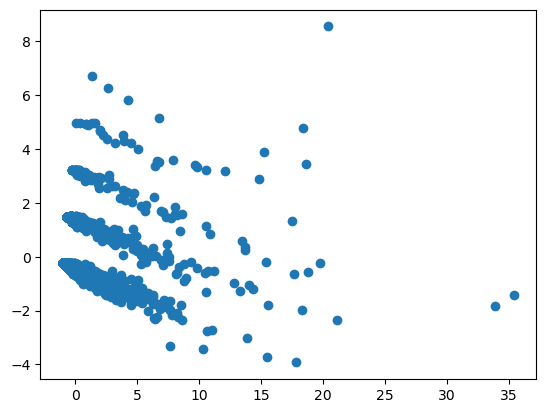

In [11]:
# plot fist two components of PCA
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])

### plots

In [ ]:
**NOTE:** Following plots shows

#### PC 1

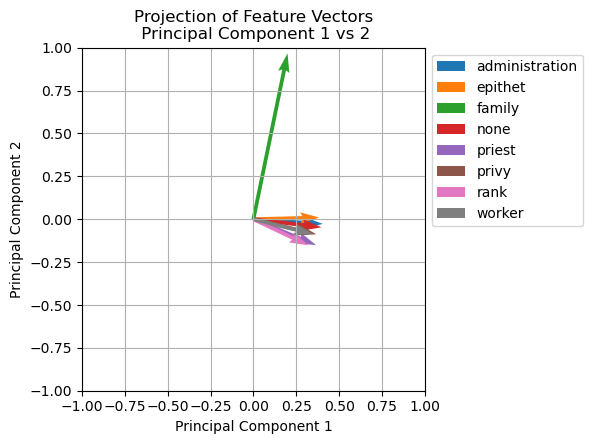

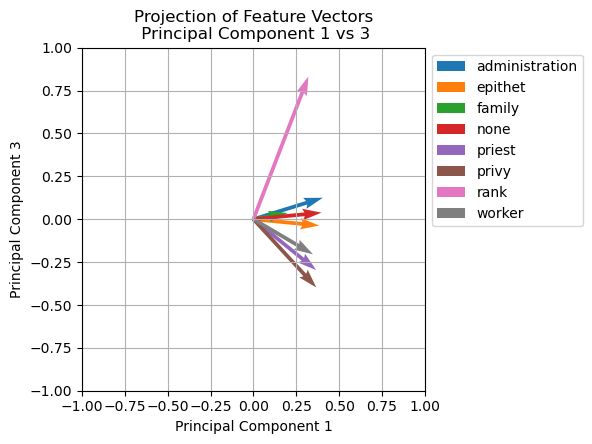

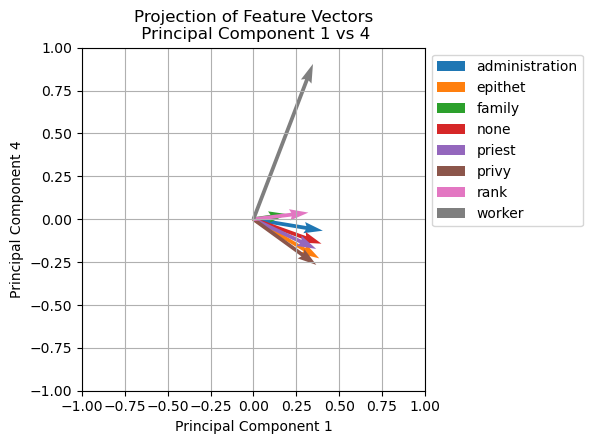

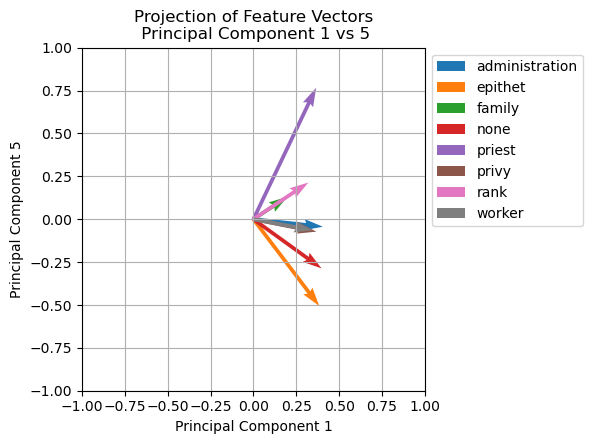

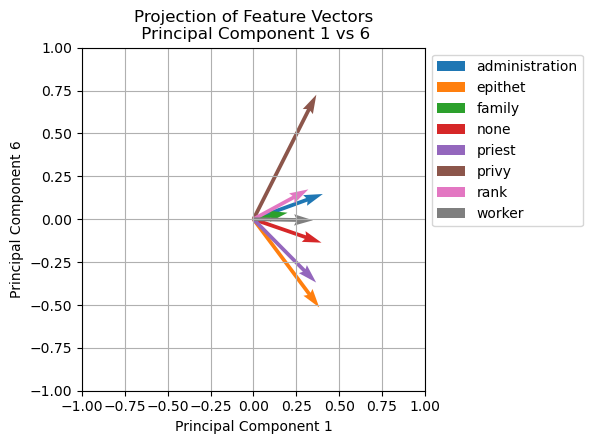

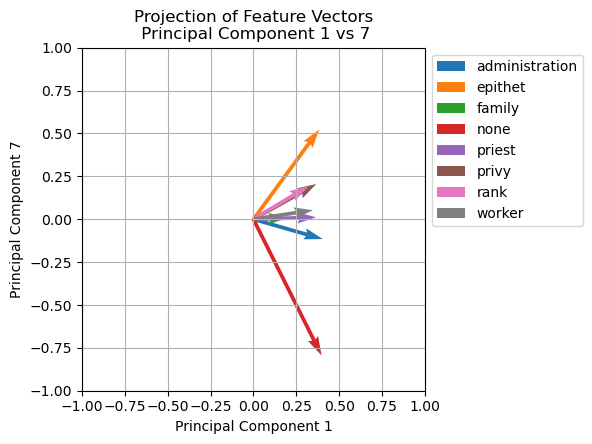

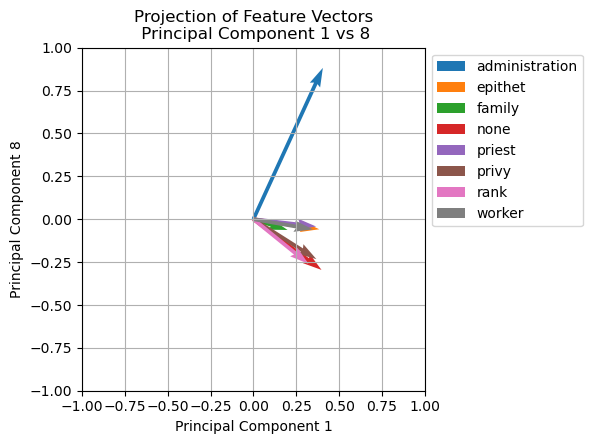

In [21]:
start = 1
for i in range(start+1, X.shape[1]+1):
    plot_PCA(pca, start, i)

#### PC 2

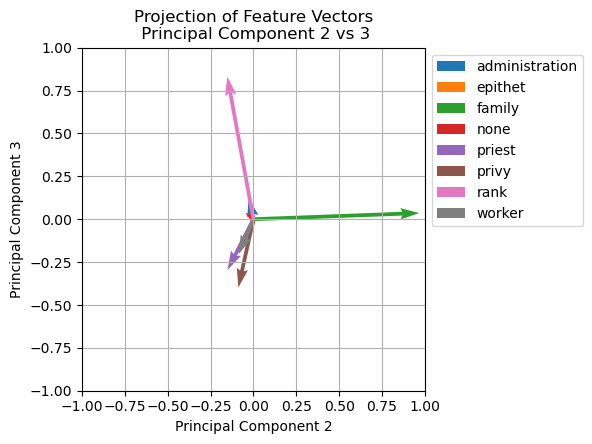

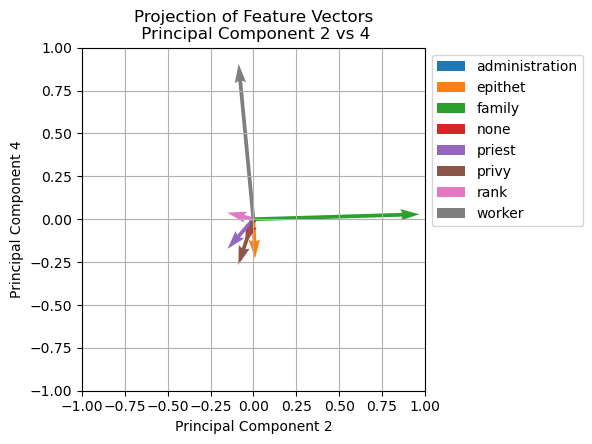

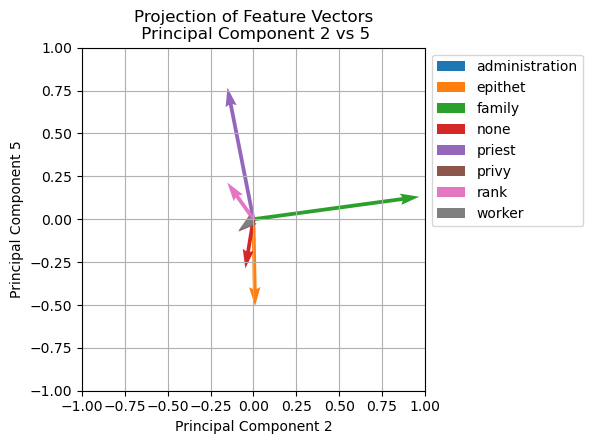

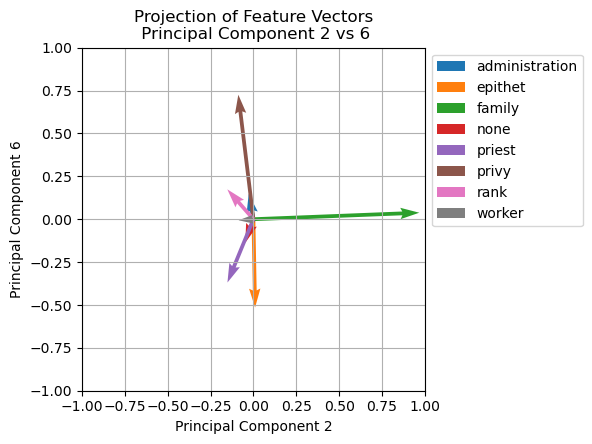

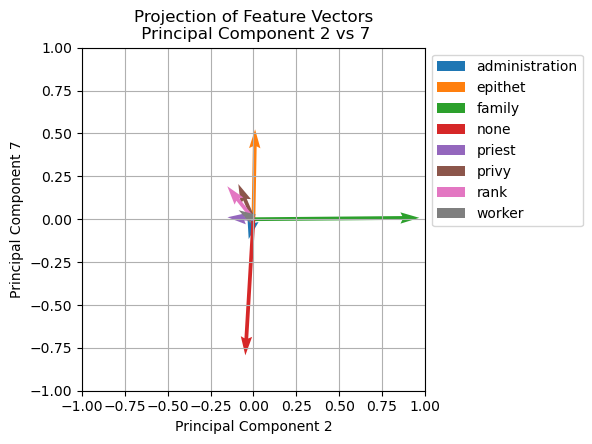

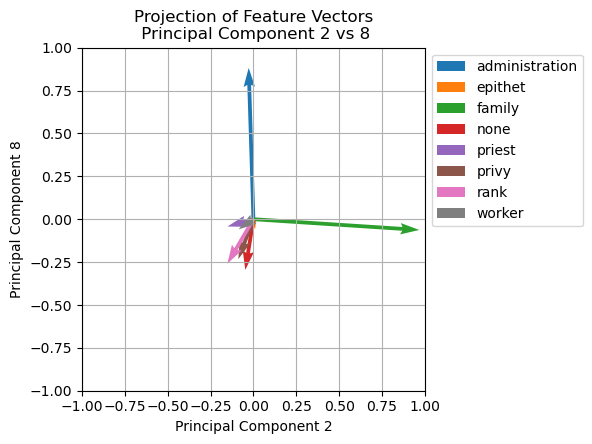

In [22]:
start = 2
for i in range(start+1, X.shape[1]+1):
    plot_PCA(pca, start, i)

#### PC 3

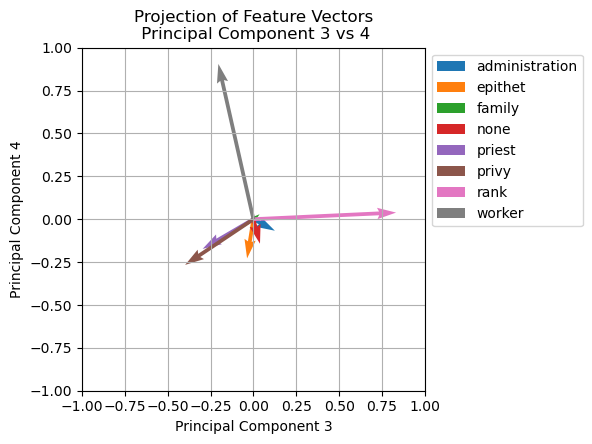

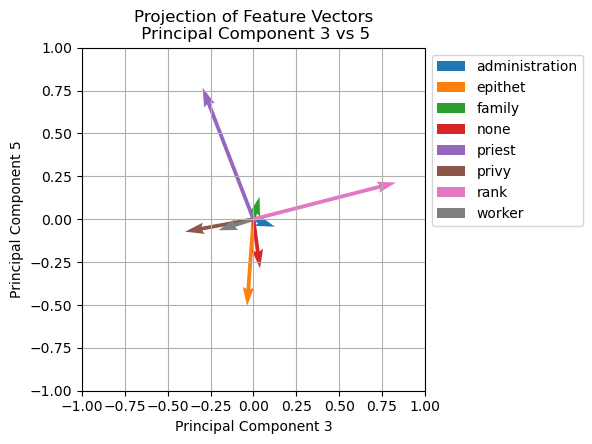

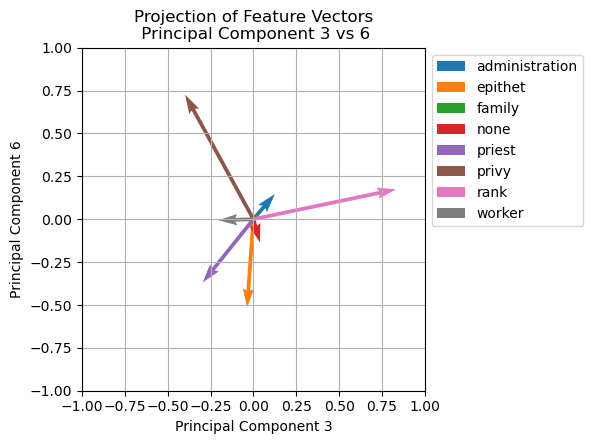

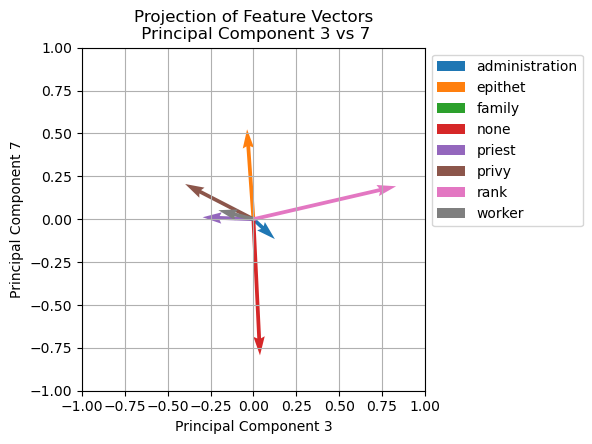

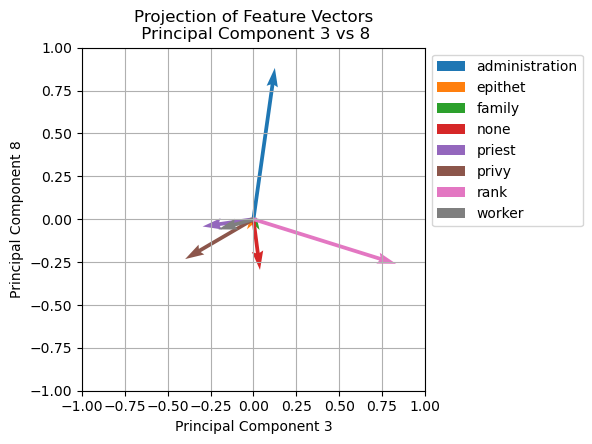

In [23]:
start = 3
for i in range(start+1, X.shape[1]+1):
    plot_PCA(pca, start, i)

### save PCA df

In [15]:
df_X = X.reset_index(drop=False)
print(df_X.shape)
df_X.head()

(3930, 9)


,ID_person,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,322,-0.775583,-0.261590,-0.035094,0.007044,-0.135760,0.176551,-0.038316,0.563835
1,323,-0.375136,-0.465387,0.958193,0.008207,-0.018048,0.219785,-0.219335,-0.491465
2,324,-1.025342,-0.244598,-0.112258,0.048428,-0.108684,0.085855,0.033115,0.019533
3,325,-0.778289,-0.273947,-0.088437,-0.040393,-0.287096,0.000755,-0.460920,-0.164406
4,326,-0.778289,-0.273947,-0.088437,-0.040393,-0.287096,0.000755,-0.460920,-0.164406


In [16]:
save_df(df_X, 'df_titles_pca_3D')

Dataframe saved into C:\Users\Stoja\OneDrive\Documents\diplomka\scr\data\df_titles_pca_3D.csv
